In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [9]:
# Simulating Data
n = 1000
x = np.random.normal(3, 5, size = n)
y = -15 * x + 20 + np.random.normal(0, 3, size = n) # noise -> data points wouldn't align in a line

In [10]:
print(y)

[-9.22284393e+01 -3.59212910e+01  6.32817428e+00 -8.54026699e+01
 -1.43383455e+02 -1.04721032e+02  3.85835928e+01  7.50676472e+01
 -1.63829027e+02 -4.42648352e+01 -2.62152740e+01  1.25116422e+01
 -2.00894783e+02  8.34553846e+01  9.71054137e+00  3.34137613e+01
  9.63896505e+01 -4.36015888e+01 -2.01578628e+02 -8.32864014e+01
  8.35360161e+01 -1.91585876e+02  7.21515095e+01 -1.52523889e+02
  1.02619253e+02 -2.49211190e+01  3.05313924e+01 -7.57647018e+01
 -4.14534776e+01 -2.20280620e+01  1.22179710e+01  5.69099545e+01
 -5.97713499e+00 -1.01568455e+02 -3.03297553e-02 -3.38934967e+01
 -9.84618623e+01 -2.62515220e+01  1.30890124e+02 -4.26562605e+01
 -1.54274959e+01 -6.81681984e+01 -1.20865739e+02  1.35264362e+01
 -9.31226863e+01 -1.30891425e+02 -4.55040003e+01  6.42933057e+01
  3.10242496e+01 -3.17901237e+00 -2.38765400e+02 -1.79169045e+02
 -6.67268508e+01 -1.38160374e+02 -3.90873430e+01 -5.16405638e+01
  7.16974580e+01  4.49684633e+01 -2.13627219e+01 -3.76417608e+01
  8.02051852e+01 -6.73762

In [11]:
# Analytical approach for solving linear regression
X = np.sum(x)
Y = np.sum(y)
b1 = (n * np.dot(x,y) - X * Y) / (n * np.dot(x,x) - X**2)
b0 = (Y - b1 * X) / n
b1, b0 = round(b1, 2), round(b0, 2)
print(f"y = {b1} x + {b0}")

y = -15.02 x + 20.04


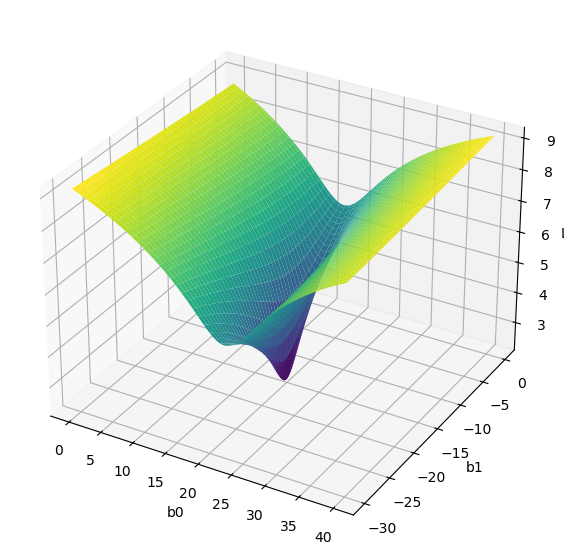

In [15]:
def MSE_loss(b0, b1, x, y):
    pred = b1 * x + b0
    loss = np.sum((pred - y) ** 2) / len(y)
    return loss

# Generate a grid of b0 and b1 values around the real b=20 and b1=-15
b0_vals = np.linspace(0, 40, 100)
b1_vals = np.linspace(-30, 0, 100)

# Calculate MSE loss for each point of this grid
# Log-scale is used only for better visualization
Z = np.zeros((len(b0_vals), len(b1_vals)))
for i in range(len(b0_vals)):
    for j in range(len(b1_vals)):
        Z[i , j] = np.log(MSE_loss(b0_vals[i], b1_vals[j], x, y))

# 3D Plot of MSE loss in log-scale
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
B0, B1 = np.meshgrid(b0_vals, b1_vals)
ax.plot_surface(B0, B1, Z, cmap='viridis')

ax.set_xlabel('b0')
ax.set_ylabel('b1')
ax.set_zlabel('Loss')
plt.show()